## Understanding Data

1. Asking Basic Questions
2. Exploratory Data Analysis - Univariate Data Analysis
3. Exploratory Data Analysis - Bivariate Data Analysis

1. Asking Basic Questions

### Importing necessary libraries

In [632]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Downloading the dataset

In [633]:
df = pd.read_csv('customer_churn_dataset.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,Churn
0,Cust_1,Male,0.0,Yes,No,2.0,Yes,No,NaN,No,No internet service,1
1,Cust_2,Female,1.0,No,No,NaN,Yes,No,Fiber optic,Yes,Yes,0
2,Cust_3,Male,0.0,NaN,Yes,NaN,NaN,Yes,NaN,No,NaN,0
3,Cust_4,Male,1.0,No,No,13.0,Yes,No phone service,NaN,No,NaN,0
4,Cust_5,NaN,1.0,Yes,Yes,55.0,No,No,NaN,Yes,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Cust_9996,Female,0.0,No,No,NaN,No,No phone service,Fiber optic,No internet service,No internet service,1
9996,Cust_9997,Male,0.0,No,No,NaN,No,NaN,NaN,Yes,Yes,1
9997,Cust_9998,Female,0.0,No,Yes,7.0,No,Yes,Fiber optic,No,NaN,0
9998,Cust_9999,Female,NaN,No,No,12.0,No,NaN,Fiber optic,Yes,No,1


### 1. How big is the data?

In [634]:
df.shape

(10000, 12)

Based on the DataFrame's shape of (10000, 12), we interpret it as a 2-D tensor consisting of 10,000 different 12-dimensional vectors.

### 2. How does the data look like?

In [635]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,Churn
9823,Cust_9824,Female,1.0,Yes,Yes,3.0,Yes,No,Fiber optic,Yes,No internet service,1
6742,Cust_6743,Female,1.0,No,No,63.0,No,Yes,DSL,Yes,NaN,1
7019,Cust_7020,Female,0.0,No,No,63.0,Yes,Yes,DSL,No internet service,No,0
9752,Cust_9753,Female,0.0,No,No,24.0,Yes,No phone service,NaN,No internet service,No,1
8354,Cust_8355,Male,0.0,No,No,58.0,Yes,No phone service,DSL,No internet service,No,0


The reason for using df.sample(5) instead of df.head(5) is that df.sample() picks a random set of rows from the dataset, whereas df.head() selects the top n rows. Since some datasets may be biased with the initial rows, using df.sample() provides a more general overview of the data.

### 3. What is the data type of columns?

In [636]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerID       10000 non-null  object 
 1   gender           9000 non-null   object 
 2   SeniorCitizen    9000 non-null   float64
 3   Partner          9000 non-null   object 
 4   Dependents       9000 non-null   object 
 5   tenure           9000 non-null   float64
 6   PhoneService     9000 non-null   object 
 7   MultipleLines    9000 non-null   object 
 8   InternetService  9000 non-null   object 
 9   OnlineSecurity   9000 non-null   object 
 10  OnlineBackup     9000 non-null   object 
 11  Churn            10000 non-null  int64  
dtypes: float64(2), int64(1), object(9)
memory usage: 937.6+ KB


Based on the output of df.info(), the following observations can be made:

1.   The memory used by the data on the disk is approximately 937.6 KB.
2.   The Senior Citizen and Tenure columns are of float64 data type. Since Senior Citizen is a categorical data type, it doesn't need to be in float; we can convert it to int to reduce the memory consumption.
3. Except for the Customer ID and Churn columns, the remaining columns have 1,000 missing rows that need to be handled


### 4. Are there any missing values?

In [637]:
df.isnull().sum()

,0
customerID,0
gender,1000
SeniorCitizen,1000
Partner,1000
Dependents,1000
tenure,1000
PhoneService,1000
MultipleLines,1000
InternetService,1000
OnlineSecurity,1000


### 5. How does the data look mathematically?

In [638]:
df.describe()

,SeniorCitizen,tenure,Churn
count,9000.000000,9000.000000,10000.000000
mean,0.500111,36.459889,0.502000
std,0.500028,20.691516,0.500021
min,0.000000,1.000000,0.000000
25%,0.000000,19.000000,0.000000
50%,1.000000,37.000000,1.000000
75%,1.000000,54.000000,1.000000
max,1.000000,72.000000,1.000000


Since Senior Citizen and Churn are categorical data types, descriptive statistics are more meaningful for quantitative data types like the Tenure column in this case. The following observations can be made for the Tenure column based on the 9,000 rows of data available:

1.   The average tenure of customers in this telecommunications company is around 36.46 months.
2.   The standard deviation of this sample data is around 20.7 months.
3. Nearly 50% of the customers have a tenure of 54 months.
4. The minimum tenure of a customer is just 1 month, while the maximum tenure is 72 months.




### 6. Are there duplicate values?

In [639]:
df.duplicated().sum()

0

This shows that all the rows are unique

### 7. How is the correlation between the columns

In [640]:
df[['tenure', 'Churn']].corr()

,tenure,Churn
tenure,1.000000,-0.004161
Churn,-0.004161,1.000000


This indicates that there is a weak negative correlation of approximately 0.41% between Tenure and Churn

## Understanding Data - Univariate Exploratory Data Analysis

In [641]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,Churn
0,Cust_1,Male,0.0,Yes,No,2.0,Yes,No,NaN,No,No internet service,1
1,Cust_2,Female,1.0,No,No,NaN,Yes,No,Fiber optic,Yes,Yes,0
2,Cust_3,Male,0.0,NaN,Yes,NaN,NaN,Yes,NaN,No,NaN,0
3,Cust_4,Male,1.0,No,No,13.0,Yes,No phone service,NaN,No,NaN,0
4,Cust_5,NaN,1.0,Yes,Yes,55.0,No,No,NaN,Yes,Yes,1


1. **Categorical Data** - Customer ID, Gender, Senior Citizen, Partner , Dependents, Phone Service, Multiple Lines, Internet Service, Online Security, Online Backup, Churn

2. **Quantitative Data** - Tenure

## 1. Categorical Data - Gender

## **(a) Count Plot**

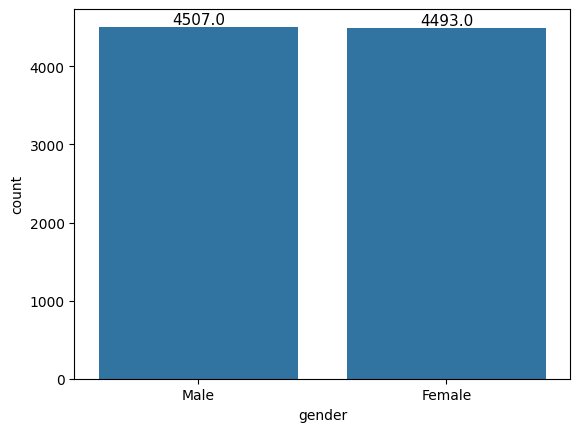

In [642]:
ax = sns.countplot(x='gender', data=df)

# Annotate the bars with counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

**(b) Pie Chart**

<Axes: ylabel='count'>

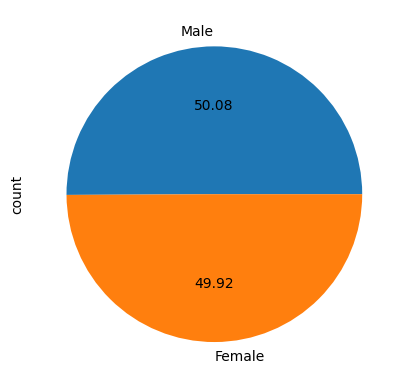

In [643]:
df['gender'].value_counts().plot(kind='pie', autopct = '%.2f')

The data shows a nearly equal proportion of males and females, with males making up 50.08% and females 49.92%

## 2. Categorical Data - Senior Citizen

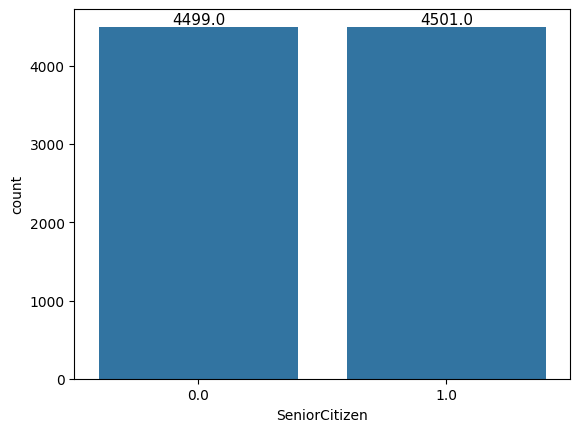

In [644]:
ax = sns.countplot(x='SeniorCitizen', data=df)

# Annotate the bars with counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

<Axes: ylabel='count'>

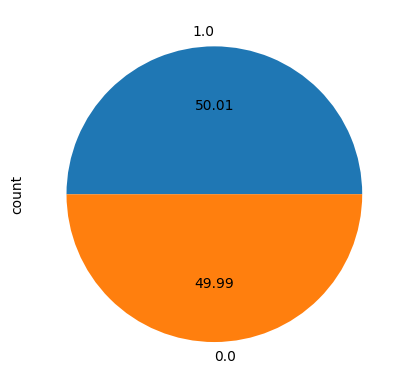

In [645]:
df['SeniorCitizen'].value_counts().plot(kind='pie', autopct = '%.2f')

The data shows a nearly equal proportion of non-senior and senior citizens, with non-seniors making up 49.99% and seniors 50.01%

## 3. Categorical Data - Partner

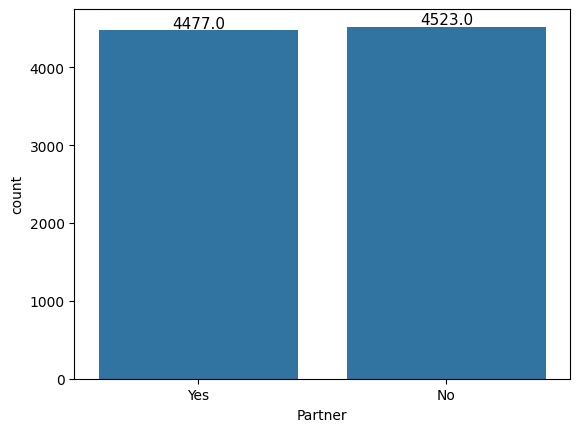

In [646]:
ax = sns.countplot(x='Partner', data=df)

# Annotate the bars with counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

<Axes: ylabel='count'>

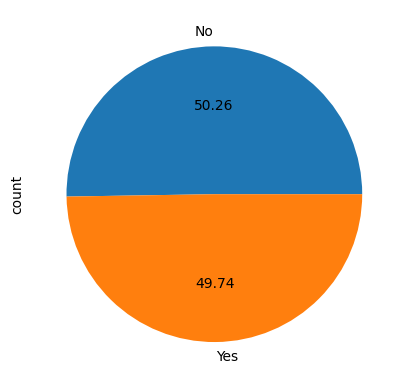

In [647]:
df['Partner'].value_counts().plot(kind='pie', autopct = '%.2f')

The data shows a nearly equal proportion of customers with and without partners, with customers without partners slightly outnumbering those with partners by 0.52%

## 4. Categorical Data - Dependents

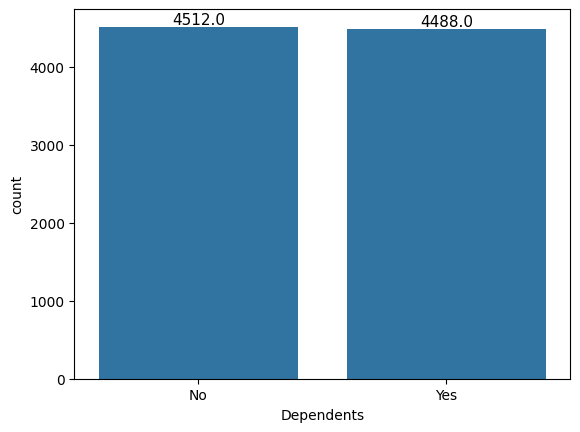

In [648]:
ax = sns.countplot(x='Dependents', data=df)

# Annotate the bars with counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

<Axes: ylabel='count'>

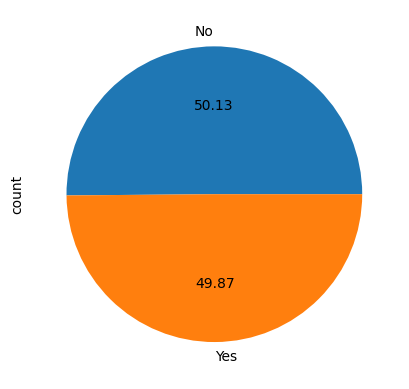

In [649]:
df['Dependents'].value_counts().plot(kind='pie', autopct = '%.2f')

The data shows a nearly equal proportion of customers with and without dependents, with customers without dependents slightly outnumbering those with partners by 0.26%

## 5. Categorical Data - Phone Service

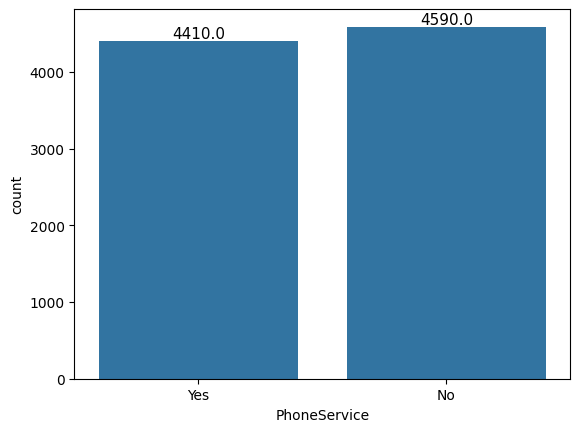

In [650]:
ax = sns.countplot(x='PhoneService', data=df)

# Annotate the bars with counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

<Axes: ylabel='count'>

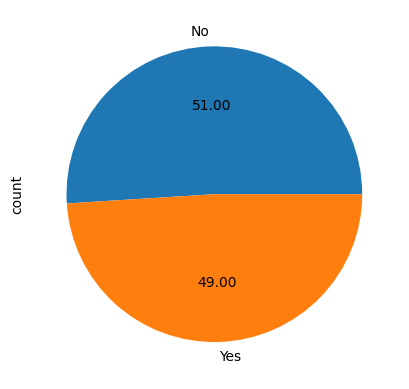

In [651]:
df['PhoneService'].value_counts().plot(kind='pie', autopct = '%.2f')

The pie chart shows that there are 2% more people who do not have a phone service, making up more than 50% of the total customers

## 6. Categorical Data - Multiple Lines

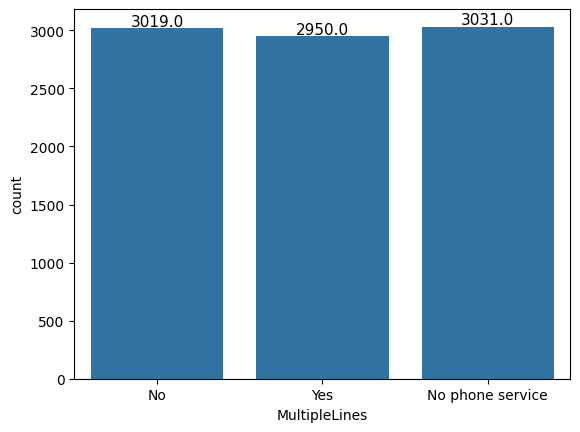

In [652]:
ax = sns.countplot(x='MultipleLines', data=df)

# Annotate the bars with counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

<Axes: ylabel='count'>

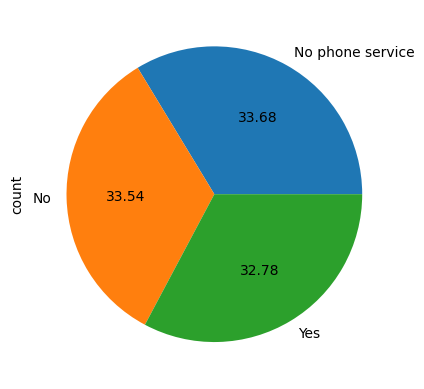

In [653]:
df['MultipleLines'].value_counts().plot(kind='pie', autopct = '%.2f')

1.   The customer base is almost evenly split across the three categories.

2.   A significant portion (33.68%) of customers do not have phone service, which might indicate that a substantial number rely only on internet-based services.

3. Among customers who do have phone service, the split between single-line and multiple-line users is nearly equal.

4. This insight could be useful for targeted marketing strategies, such as encouraging single-line users to upgrade to multiple lines or converting "No Phone Service" customers to adopt phone plans.




## 7. Categorical Data - Internet Service

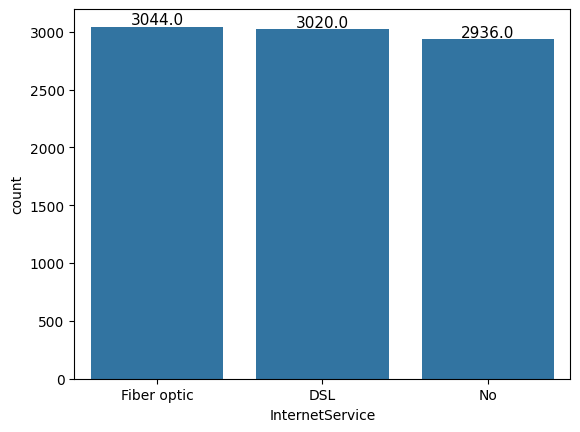

In [654]:
ax = sns.countplot(x='InternetService', data=df)

# Annotate the bars with counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

<Axes: ylabel='count'>

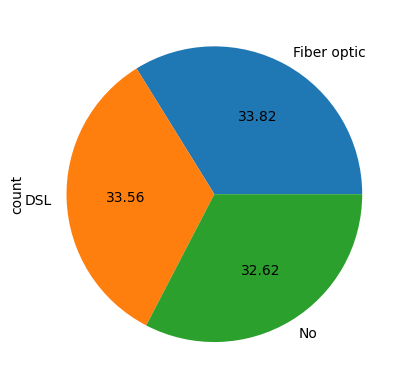

In [655]:
df['InternetService'].value_counts().plot(kind='pie', autopct = '%.2f')

This bar chart represents the distribution of customers based on their Internet Service type in a telecommunications company. The three categories displayed are:

1. Fiber optic (3044 customers) – The most popular internet service among customers.
2. DSL (3020 customers) – Almost as popular as Fiber optic.
3. No Internet Service (2936 customers - 32.62%) – A significant number of customers do not have an internet subscription.

## 8. Categorical Data - Online Security

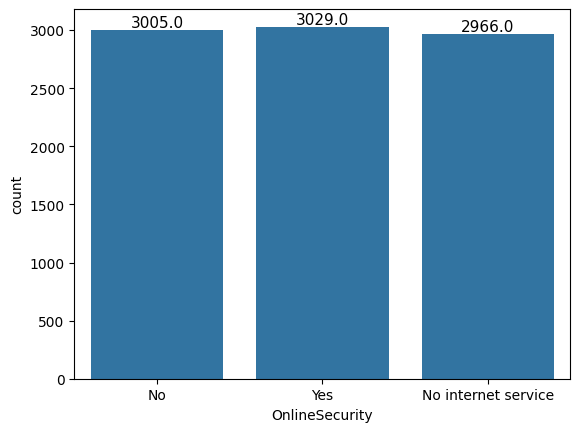

In [656]:
ax = sns.countplot(x='OnlineSecurity', data=df)
# Annotate the bars with counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

<Axes: ylabel='count'>

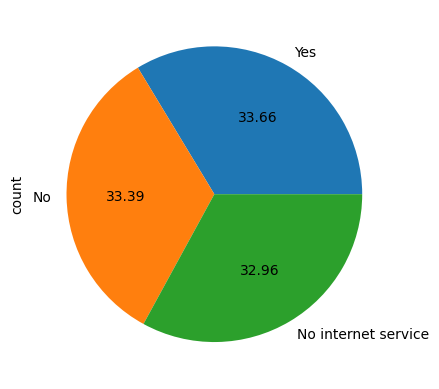

In [657]:
df['OnlineSecurity'].value_counts().plot(kind='pie', autopct = '%.2f')

1. A nearly equal split between customers who have Online Security (3029) and those who do not (3005) suggests that online security is not a universally preferred add-on.

2. A large portion of customers (2966) do not have internet service, meaning they are not even in the pool for online security.

3. Potential for Upselling: The company may have an opportunity to target the "No" group (3005 customers) with security awareness campaigns or bundled offers.
Customer Behavior: The similar count in each category suggests Online Security might not be a deciding factor for choosing internet service, but rather a personal preference.

## 9. Categorical Data - Online Backup

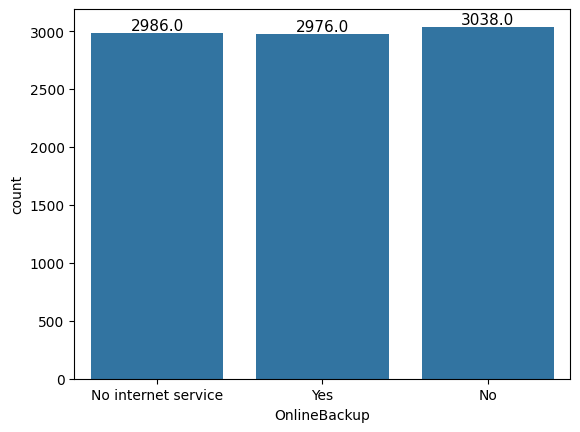

In [658]:
ax = sns.countplot(x='OnlineBackup', data=df)
# Annotate the bars with counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

<Axes: ylabel='count'>

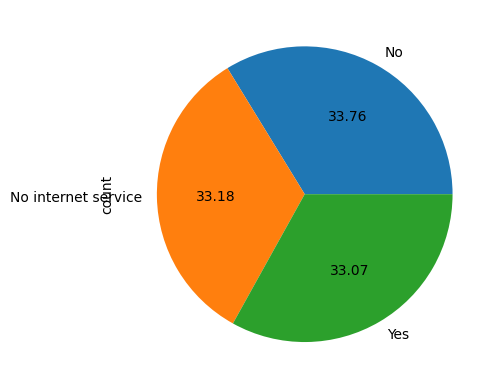

In [659]:
df['OnlineBackup'].value_counts().plot(kind='pie', autopct = '%.2f')

1. A nearly equal split between customers who subscribe to Online Backup (2976) and those who do not (3038), indicating that it is not a must-have feature for all users.

2. A significant number (2986) of customers do not use internet service, making them ineligible for Online Backup.

3. Potential for Growth: The company could explore upselling opportunities by targeting the "No" group (3038 customers) with incentives, such as free trials or bundled services.

4. Customer Preference: Similar to Online Security, Online Backup does not seem to be a decisive factor for internet users, meaning customer education or bundling strategies might be needed to drive adoption.

## 10. Categorical Data - Churn

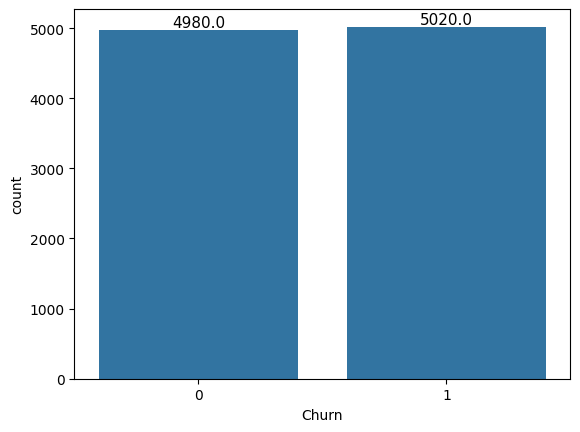

In [660]:
ax = sns.countplot(x='Churn', data=df)
# Annotate the bars with counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

<Axes: ylabel='count'>

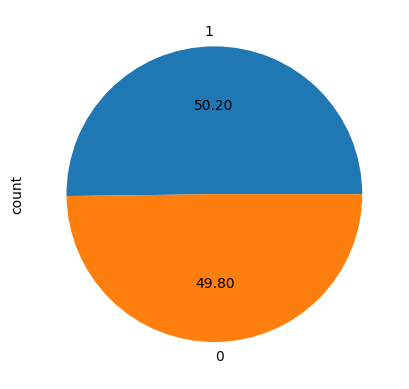

In [661]:
df['Churn'].value_counts().plot(kind='pie', autopct = '%.2f')

This pie chart represents the Churn Rate in a telecommunications company, showing the proportion of customers who have either stayed or left the service.

1 -  (50.20%) – These customers have churned (canceled their subscription).

0 - (49.80%) – These customers have remained with the company.


Key Insights:


1. The churn rate is extremely high (~50%), meaning that nearly half of the customers are leaving the service. This is a critical issue that requires immediate attention.

2. Retention strategies are essential, as customer loss at this rate could significantly impact revenue and business sustainability.

3. Further Analysis Needed:

- What factors contribute to churn? (e.g., service quality, pricing, contract length, additional features like Online Security or Backup)

- Are certain demographics (e.g., senior citizens) more likely to churn?

- Do customers with Fiber Optic or DSL churn at different rates?

## Numerical Data - Tenure

### (a) Histogram

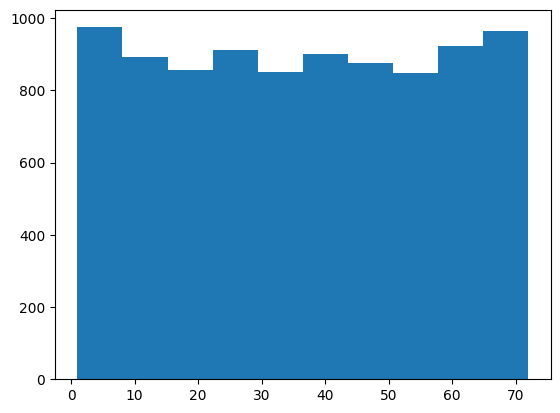

In [662]:
plt.hist(df['tenure'], bins = 10)
plt.show()

Key Observations:

Even Distribution: The tenure of customers appears to be almost evenly distributed across different time periods, meaning there is no strong concentration of customers at a particular length of service.

Churn Risk in Early Months: The first few months (0-10 months) have a slightly higher count of customers, which might indicate many new customers signing up or a higher churn rate among short-term users.

Long-Term Customers Exist: The number of customers remains relatively consistent up to 70 months, meaning the company retains some long-term customers.

Possible Influence on Churn: Since the churn rate (from the previous pie chart) is high (~50%), it would be useful to analyze whether short-tenure customers are more likely to leave. If so, this suggests issues like pricing dissatisfaction, service quality, or lack of incentives for retention.

## (b) Distplot

<ipython-input-663-054c9505040c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['tenure'], bins = 10)


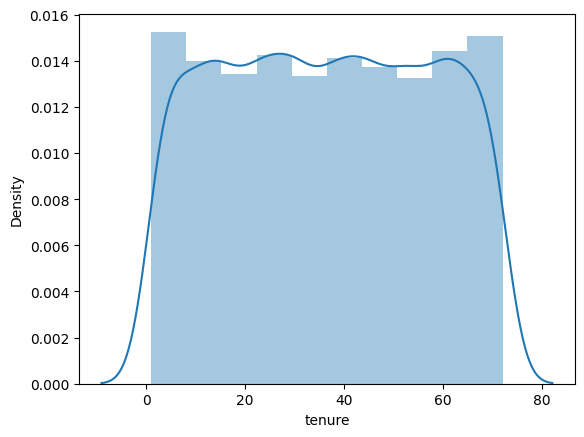

In [663]:
sns.distplot(df['tenure'], bins = 10)
plt.show()

## Skewness of Tenure Data

In [664]:
df['tenure'].skew()

0.0034978629814685354

**Interpretation of Skewness:**

- Skewness measures the asymmetry of a distribution.
A skewness of 0 means the distribution is perfectly symmetric.

- Small skewness values (close to 0) indicate near-normality or a balanced distribution.
Key Insights:

Almost No Skewness:

- Since 0.0035 is very close to 0, the tenure data is nearly symmetrical.

- There is no significant tail on either the left (negative skew) or the right (positive skew).

Not Strongly Skewed:

- If the skewness were > +1 or < -1, the data would be highly skewed.
- Here, the value is close to zero, meaning customers are fairly evenly distributed across different tenure periods.


The distplot already suggested a relatively uniform spread of tenure values.

The skewness value further confirms that there is no strong left or right skew.

Conclusion:

Tenure is symmetrically distributed, meaning customers are spread evenly across different contract durations.
The data is not significantly skewed, which makes it easier for modeling techniques that assume normality.

### **Key Insights**


Uniform Distribution:

The tenure values are fairly evenly distributed, meaning customers are spread across different tenure periods without strong peaks in any particular segment.
This suggests that customers join and leave at a consistent rate over time.
Slight Drop-off at Extremes:

The density rises sharply from 0 months and then stays relatively stable.
There is a drop-off at very high tenure values (~70-80 months), indicating that fewer customers stay for extremely long periods.

Churn Considerations:

- If churn is high (~50% from the previous pie chart), it would be important to analyze if shorter-tenure customers are leaving more frequently.

- The even distribution suggests both new and long-term customers are present, but retention strategies should focus on increasing loyalty among newer customers.

(c) Boxplot

<Axes: ylabel='tenure'>

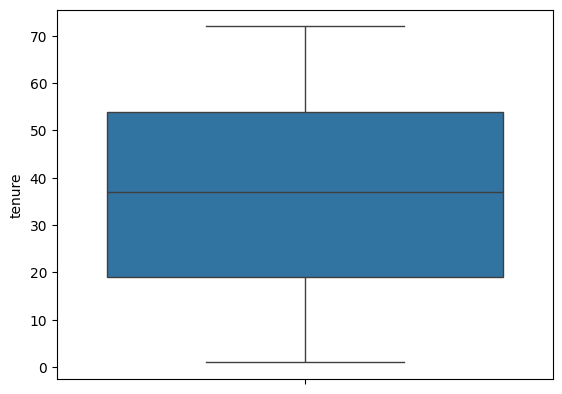

In [665]:
sns.boxplot(df['tenure'])

This box plot represents the distribution of the Tenure (length of time in months) that customers have been with the telecom company.

Key Observations:

**Median (~37 months)**:

The middle line inside the box represents the median tenure, which appears to be around 37 months.
This means 50% of customers have a tenure below ~37 months, and 50% have a tenure above it.

**Interquartile Range (IQR)**:

The box spans from Q1 (around 12 months) to Q3 (around 58 months).
This means 50% of the customers have a tenure between ~12 and ~58 months.

**Minimum and Maximum Tenure**:

The lower whisker starts close to 0 months, meaning some customers have just recently joined.
The upper whisker extends above 70 months, indicating some long-term customers have stayed for over 6 years.

**No Extreme Outliers**:

Since there are no individual points outside the whiskers, there are no extreme outliers in the tenure data.
This suggests a steady distribution of customer tenure.

**Business Implications**:

Since 50% of customers stay less than around 37 months, retention strategies should focus on reducing churn within the first 3 years.

The upper quartile (above around 58 months) shows a strong base of loyal customers who have been with the company long-term.

If churn is high, analyzing customers in the lower quartile (~0-12 months) could reveal pain points leading to early exits.

## Understanding Data - Bivariate and Multivariate Analysis

### (i) Bar Plot - Numerical to Categorical Data

#### Gender - Tenure

<Axes: xlabel='gender', ylabel='tenure'>

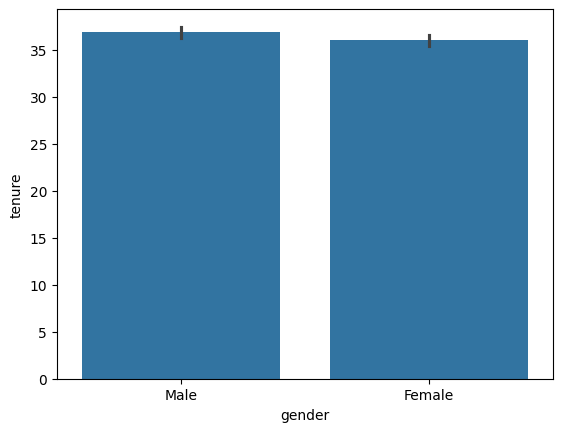

In [666]:
sns.barplot(x='gender', y='tenure', data=df)

- The average tenure for male customers appears slightly higher than for female customers, though the difference is small.
- Both genders have a similar tenure duration, suggesting that gender does not have a strong influence on how long customers stay with the telecom company.

#### Senior Citizen - Tenure

<Axes: xlabel='SeniorCitizen', ylabel='tenure'>

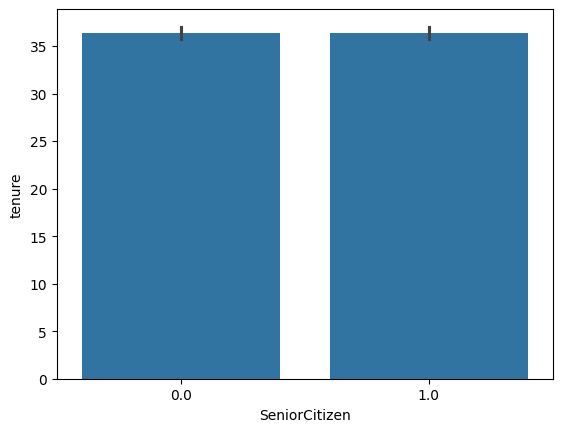

In [667]:
sns.barplot(x='SeniorCitizen', y='tenure', data=df)

Comparison of Tenure by Senior Citizen Status:

- The average tenure for senior citizens (1) and non-senior citizens (0) appears nearly identical.

- This suggests that age does not have a significant impact on how long a customer stays with the telecom company.

<Axes: xlabel='Partner', ylabel='tenure'>

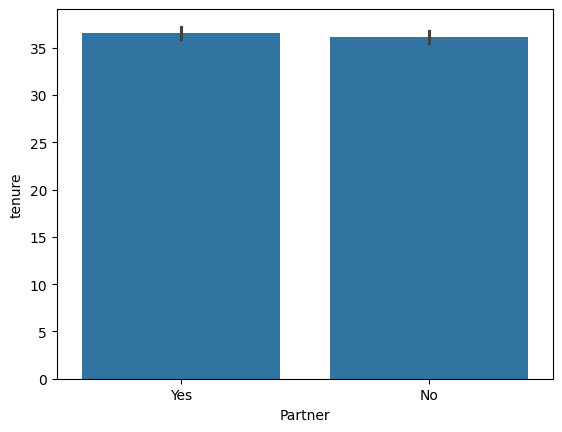

In [668]:
sns.barplot(x='Partner', y='tenure', data=df)

Comparison of Tenure by Partner Status:

- The average tenure for customers with a partner and without a partner is almost the same.

- This suggests that having a partner does not significantly influence customer tenure in this telecom dataset.


#### Dependents - Tenure

<Axes: xlabel='Dependents', ylabel='tenure'>

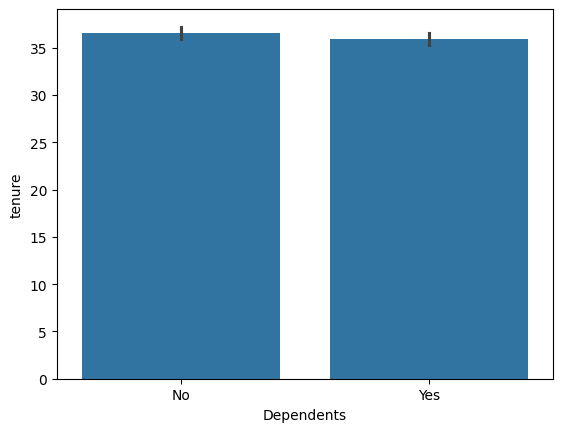

In [669]:
sns.barplot(x='Dependents', y='tenure', data=df)

- The average tenure for customers without dependents is slightly higher than for those with dependents.
- However, the difference is small, suggesting that having dependents does not have a major impact on customer tenure.

#### Phone Service - Tenure

<Axes: xlabel='PhoneService', ylabel='tenure'>

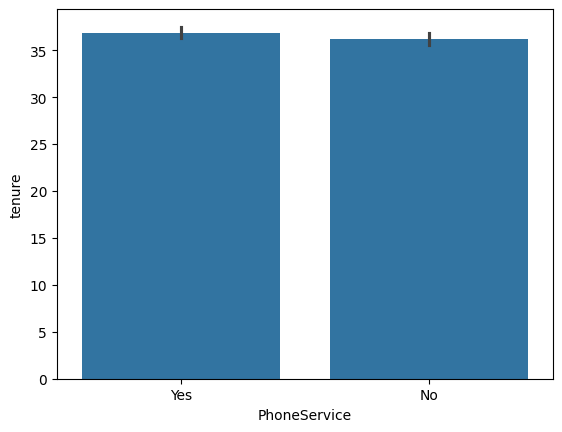

In [670]:
sns.barplot(x='PhoneService', y='tenure', data=df)

Comparison of Tenure by Phone Service Status:

- Customers with phone service and those without phone service have almost identical tenure.

- This suggests that having phone service is not a major factor influencing customer retention.

#### Multiple Lines - Tenure

<Axes: xlabel='MultipleLines', ylabel='tenure'>

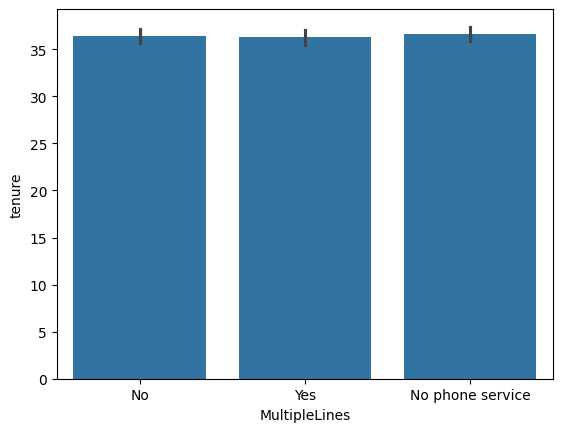

In [671]:
sns.barplot(x='MultipleLines', y='tenure', data=df)

Comparison of Tenure by Multiple Lines Status:

- Customers with multiple lines, a single line, and no phone service have very similar average tenures.

- There is no significant difference in tenure among these groups.

<Axes: xlabel='InternetService', ylabel='tenure'>

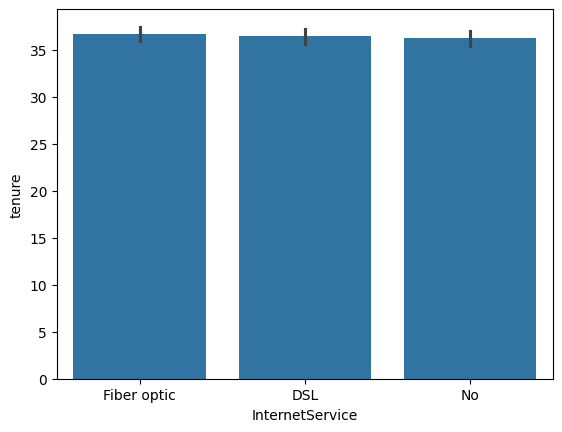

In [672]:
sns.barplot(x='InternetService', y='tenure', data=df)

Comparison of Tenure by Internet Service Type:

- Customers with Fiber optic, DSL, and No Internet Service have very similar tenure.

- The differences are minimal, indicating that Internet Service type does not have a strong impact on tenure.

#### Online Security - Tenure

<Axes: xlabel='OnlineSecurity', ylabel='tenure'>

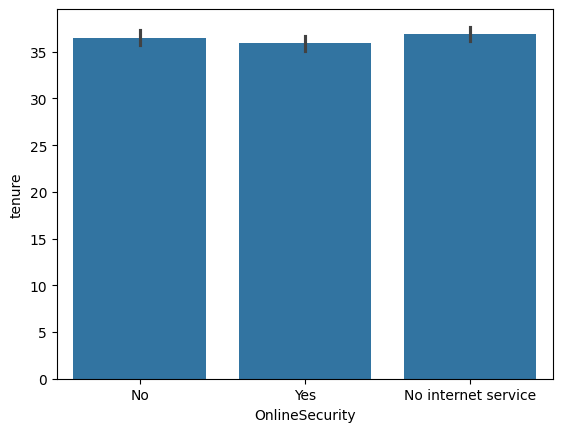

In [673]:
sns.barplot(x='OnlineSecurity', y='tenure', data=df)

- Customers who have Online Security (Yes) and those who do not (No) have very similar average tenures.

- Customers with No Internet Service have a tenure similar to those with Online Security.

- The small differences suggest Online Security does not have a significant impact on customer retention.

#### Online Backup - Tenure

<Axes: xlabel='OnlineBackup', ylabel='tenure'>

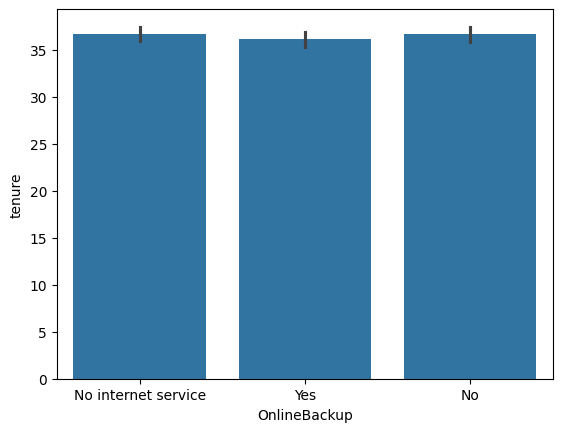

In [674]:
sns.barplot(x='OnlineBackup', y='tenure', data=df)

- Customers who have Online Backup (Yes) and those who do not (No) have very similar average tenures.
Customers with No Internet Service also have a comparable tenure.

- This suggests that Online Backup does not significantly impact customer retention.

#### Churn - Tenure

<Axes: xlabel='Churn', ylabel='tenure'>

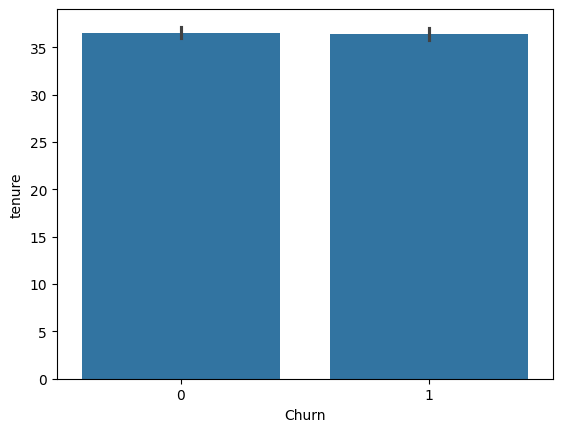

In [675]:
sns.barplot(x='Churn', y='tenure', data=df)

- The average tenure of customers who stayed (Churn = 0) and those who left (Churn = 1) appears almost identical.

- This suggests that tenure alone may not be a strong differentiator for churn.

#### Boxplot - Numerical to Categorical Data

<Axes: xlabel='gender', ylabel='tenure'>

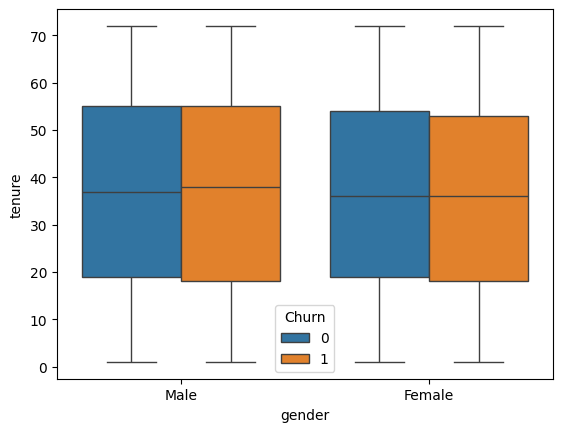

In [676]:
sns.boxplot(x='gender', y='tenure', data=df, hue= df['Churn'])

<Axes: xlabel='SeniorCitizen', ylabel='tenure'>

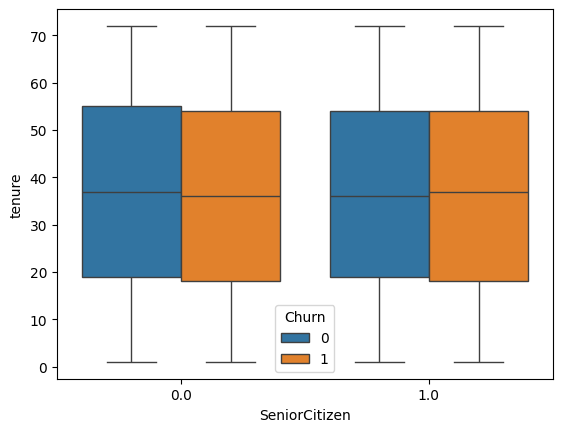

In [677]:
sns.boxplot(x='SeniorCitizen', y='tenure', data=df, hue= df['Churn'])

<Axes: xlabel='Partner', ylabel='tenure'>

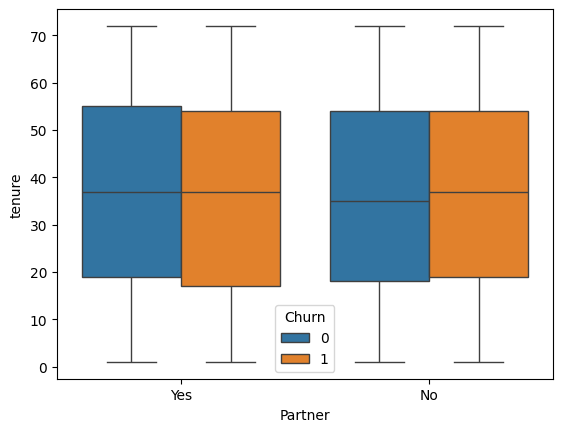

In [678]:
sns.boxplot(x='Partner', y='tenure', data=df, hue= df['Churn'])

- Churned customers (orange) generally have a lower median tenure than those who stayed (blue).

- However, the difference is still not very large.

<Axes: xlabel='Dependents', ylabel='tenure'>

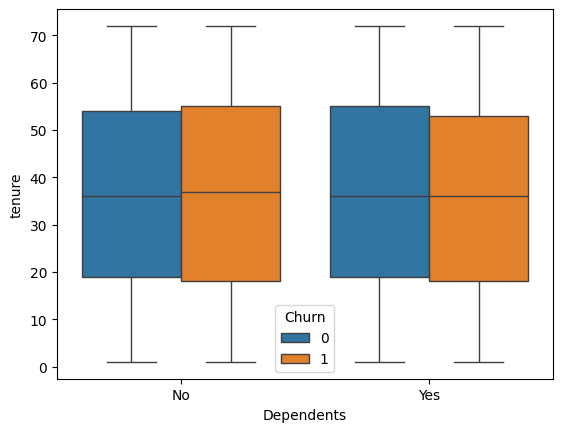

In [679]:
sns.boxplot(x='Dependents', y='tenure', data=df, hue= df['Churn'])

<Axes: xlabel='PhoneService', ylabel='tenure'>

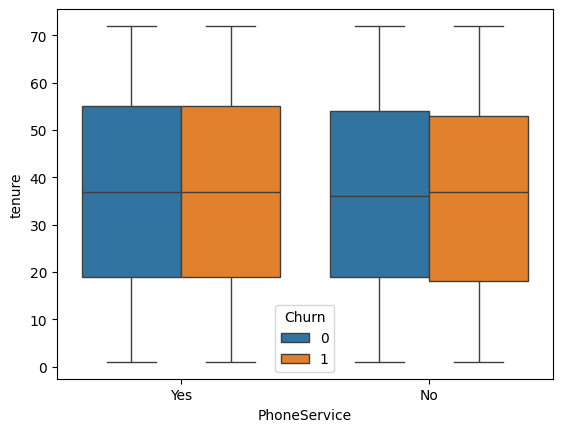

In [680]:
sns.boxplot(x='PhoneService', y='tenure', data=df, hue= df['Churn'])

<Axes: xlabel='MultipleLines', ylabel='tenure'>

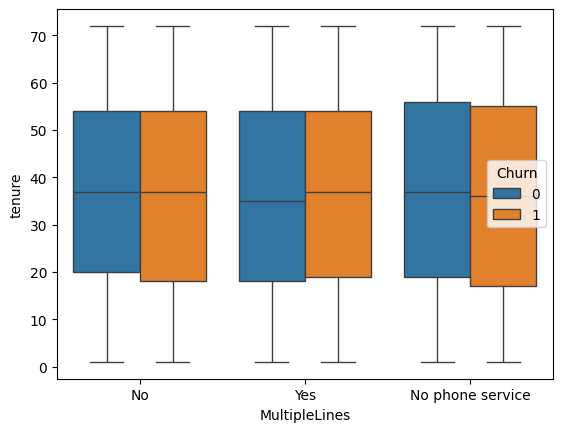

In [681]:
sns.boxplot(x='MultipleLines', y='tenure', data=df, hue= df['Churn'])

<Axes: xlabel='InternetService', ylabel='tenure'>

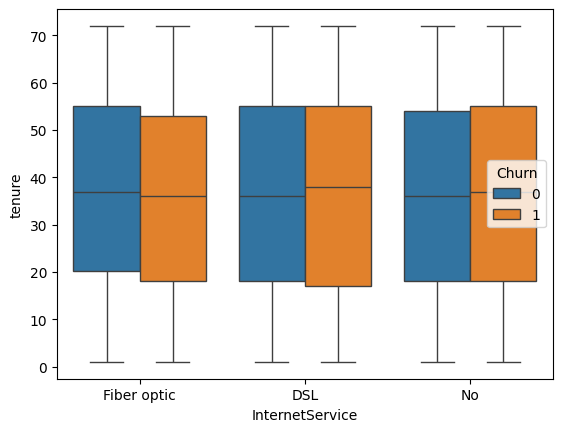

In [682]:
sns.boxplot(x='InternetService', y='tenure', data=df, hue= df['Churn'])

**Fiber Optic Customers Have a Higher Churn Rate**:

- The median tenure of churned customers (orange) in the Fiber optic category is noticeably lower than the non-churned customers (blue).
This suggests that Fiber optic customers are more likely to churn earlier in their tenure compared to DSL and No Internet Service.


**DSL and No Internet Service Show Similar Churn** Behavior:

- The tenure distributions for DSL and No Internet Service are quite similar.
Customers who churned (orange) have a slightly lower median tenure, but the difference is not as pronounced as in Fiber Optic.

<Axes: xlabel='OnlineSecurity', ylabel='tenure'>

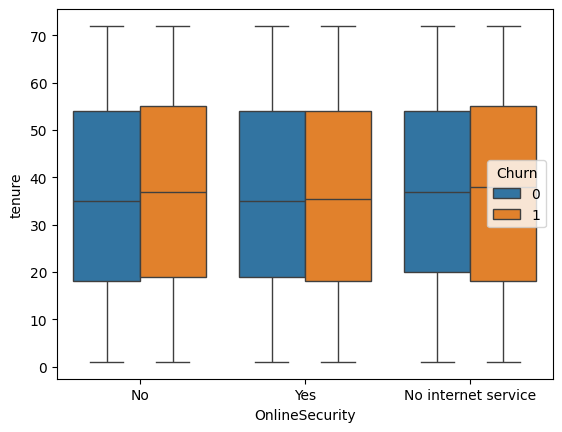

In [683]:
sns.boxplot(x='OnlineSecurity', y='tenure', data=df, hue= df['Churn'])

<Axes: xlabel='OnlineBackup', ylabel='tenure'>

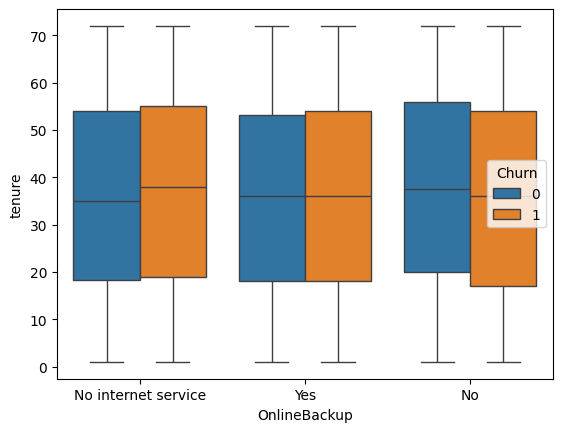

In [684]:
sns.boxplot(x='OnlineBackup', y='tenure', data=df, hue= df['Churn'])

<ipython-input-685-1531449bdd42>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Churn']==1]['tenure'])


<Axes: xlabel='tenure', ylabel='Density'>

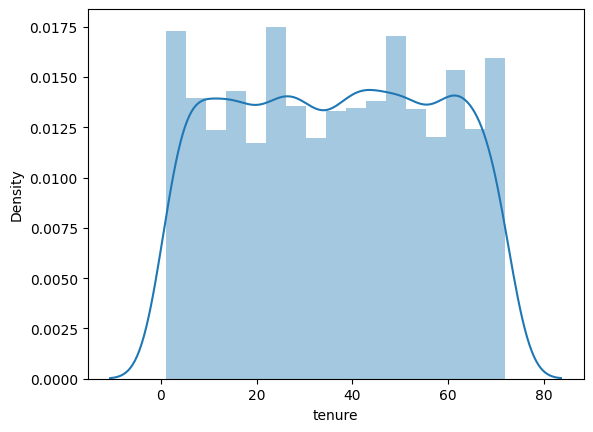

In [685]:
sns.distplot(df[df['Churn']==1]['tenure'])

- A sharp peak near very low tenure (0-10 months) suggests many customers leave early.

- A slight decline in the middle tenure range (~30-50 months) implies some stability.

- Another drop-off at high tenure values (~70-80 months) suggests long-term customers also leave, though in smaller numbers.

<ipython-input-686-bbd48a3a561b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Churn']==0]['tenure'])


<Axes: xlabel='tenure', ylabel='Density'>

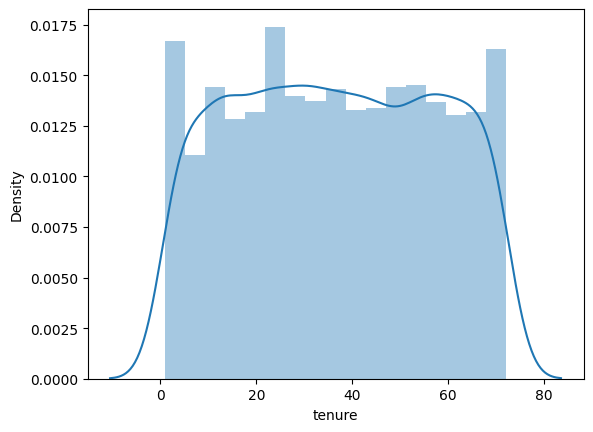

In [686]:
sns.distplot(df[df['Churn']==0]['tenure'])

More Long-Term Customers Stay:

- Compared to churned customers, there is a stronger presence of customers with higher tenure (closer to 70-80 months).
- This suggests longer-tenured customers are more loyal.

Fewer Early Departures:

- There is still a significant number of customers in the 0-10 month range, but less than the churned group.
- This indicates that customers who make it past the initial period are more likely to stay.
Mid-Tenure Stability:

A more even distribution from 20-60 months suggests customers in this range have a stable retention rate.

<ipython-input-687-4a88df3e9ab8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Churn']==1]['tenure'],hist=False)
<ipython-input-687-4a88df3e9ab8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Churn']==0]['tenure'],hist=False)


<Axes: xlabel='tenure', ylabel='Density'>

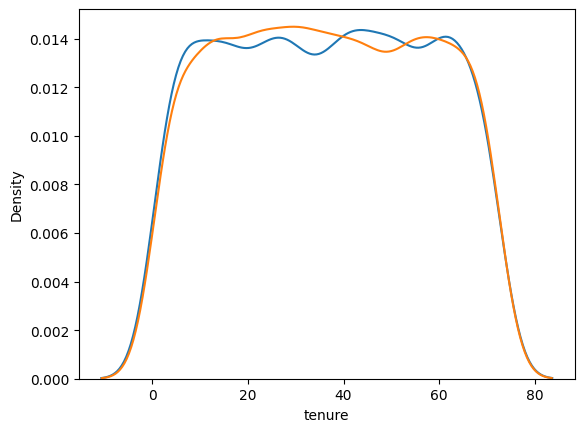

In [687]:
sns.distplot(df[df['Churn']==1]['tenure'],hist=False)
sns.distplot(df[df['Churn']==0]['tenure'],hist=False)

In [688]:
pd.crosstab(df['gender'],df['Churn'])

Churn,0,1
gender,,
Female,2293,2200
Male,2212,2295


#### HeatMap (Categorical - Categorical)

<Axes: xlabel='Churn', ylabel='gender'>

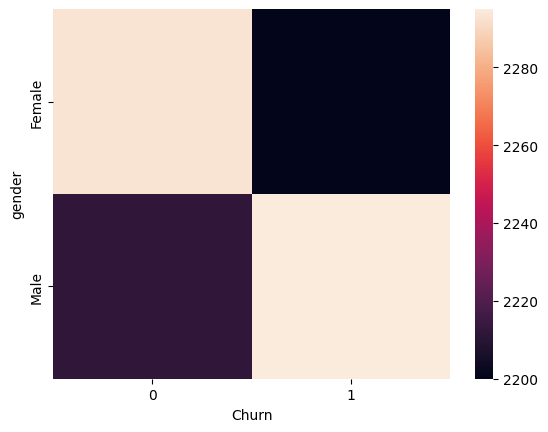

In [689]:
sns.heatmap(pd.crosstab(df['gender'],df['Churn']))

- Females have a lower churn count (darker in "Churn = 1")
This suggests that females are slightly less likely to churn compared to males.

- Males have a higher churn count (lighter in "Churn = 1")
This means males are churning at a slightly higher rate than females.

<Axes: xlabel='Churn', ylabel='SeniorCitizen'>

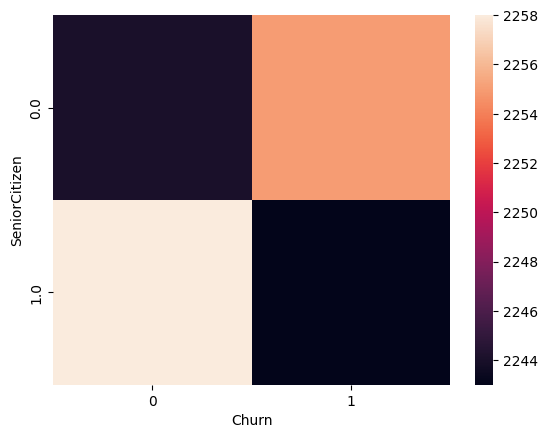

In [690]:
sns.heatmap(pd.crosstab(df['SeniorCitizen'],df['Churn']))

- Senior Citizens (1) have a lower churn count (darker in "Churn = 1")

- This suggests that fewer senior citizens are churning compared to non-senior citizens.
Non-Senior Citizens (0) have a higher churn count (lighter in "Churn = 1")

- This means more non-senior citizens are churning.





<Axes: xlabel='Churn', ylabel='Partner'>

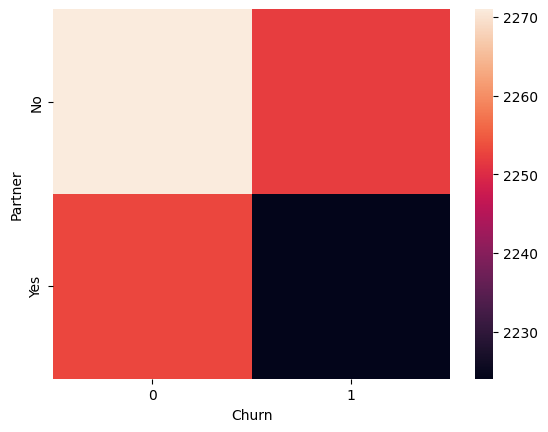

In [691]:
sns.heatmap(pd.crosstab(df['Partner'],df['Churn']))

- Customers with a partner churned more than those without a partner.
- Customers without a partner had a lower churn rate.

<Axes: xlabel='Churn', ylabel='Dependents'>

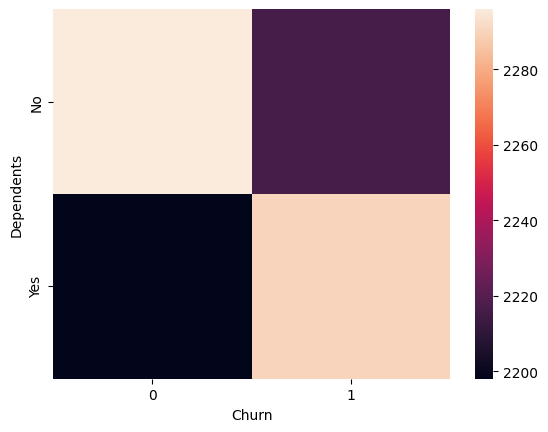

In [692]:
sns.heatmap(pd.crosstab(df['Dependents'],df['Churn']))

- Customers without dependents were more likely to stay.
- Customers with dependents churned more.

<Axes: xlabel='Churn', ylabel='PhoneService'>

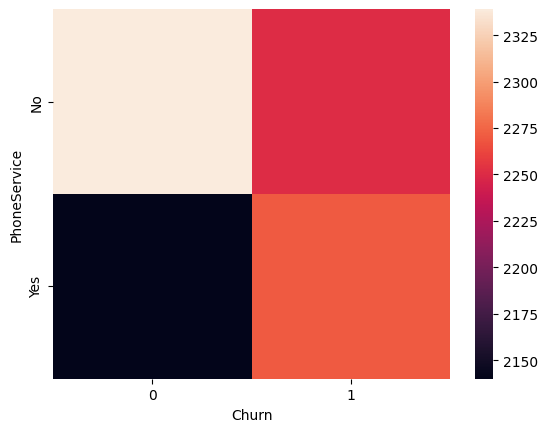

In [693]:
sns.heatmap(pd.crosstab(df['PhoneService'],df['Churn']))

- Customers without phone service were more likely to stay.

- Customers with phone service were more likely to churn.

<Axes: xlabel='Churn', ylabel='MultipleLines'>

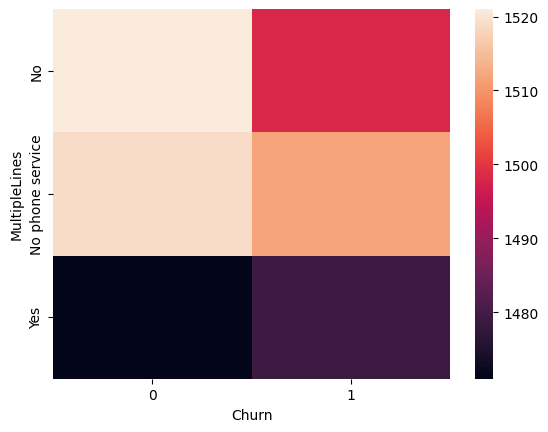

In [694]:
sns.heatmap(pd.crosstab(df['MultipleLines'],df['Churn']))

- Customers without multiple lines and phone service are more likely to stay.

- Customers with multiple lines are more likely to churn.

<Axes: xlabel='Churn', ylabel='InternetService'>

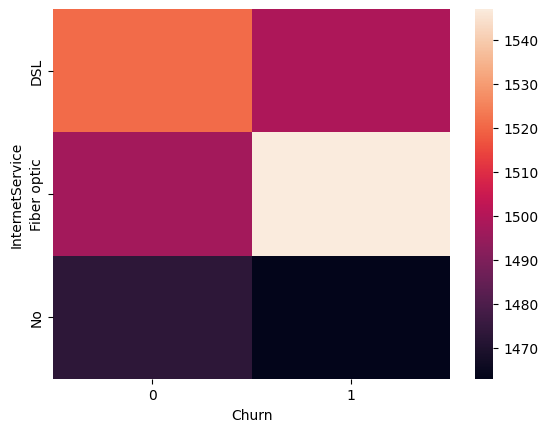

In [695]:
sns.heatmap(pd.crosstab(df['InternetService'],df['Churn']))

- Customers with Fiber Optic Internet Service are churning more
- Customers with DSL Internet Service are churning less, meaning that they prefer DSL more
- There are relatively fewer customers without Internet Service who are leaving

<Axes: xlabel='Churn', ylabel='OnlineSecurity'>

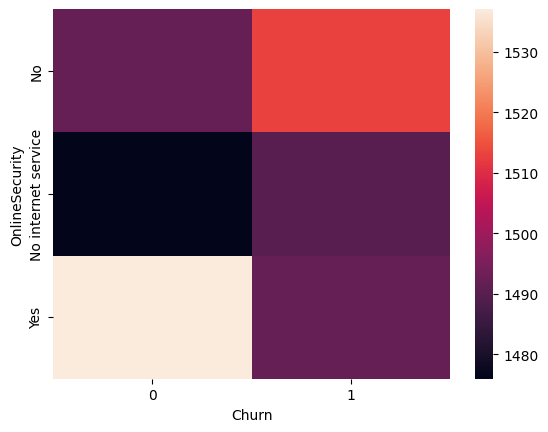

In [696]:
sns.heatmap(pd.crosstab(df['OnlineSecurity'],df['Churn']))

- Customers with Online Security are churning less
- Customers without Online Security are churning more

<Axes: xlabel='Churn', ylabel='OnlineBackup'>

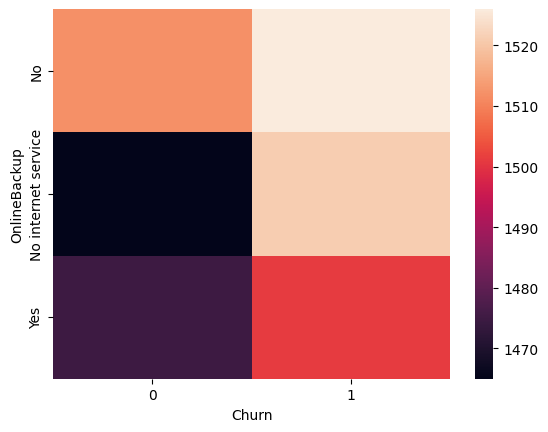

In [697]:
sns.heatmap(pd.crosstab(df['OnlineBackup'],df['Churn']))

- Customers who do not have an Online Backup service tend to churn at a higher rate, indicating that this service might contribute to retention.

- However, while customers with Online Backup are churning less, they represent a smaller portion of the customer base.

- This suggests that Online Backup is not a primary deciding factor for most customers when choosing whether to stay or leave. Other factors likely play a more significant role in customer retention.

# **Churn Analysis: Key Insights and Recommendations**

## **1. Customer Behavior and Service Impact**

### ** Internet vs. Phone Service Churn Patterns**
- Customers subscribed to **internet services are more likely to stay**.
- Customers with **only Phone Service** tend to churn at a **higher rate**.
-  **Key Insight:** The company's **Phone Services may be underperforming**, leading to dissatisfaction and churn.

### ** Internet Service Type and Retention**
- **DSL subscribers tend to stay longer**.
- **Fiber Optic users have higher churn rates**.
-  **Key Insight:** There may be **quality, pricing, or service experience issues** with the **Fiber Optic** service.

---

## **2. Demographic Insights on Churn**

| **Customer Type**    | **Churn Behavior** |
|----------------------|-------------------|
| Customers **with partners** | Churn more than those without. |
| Customers **with dependents** | Churn more than those without. |
| **Males** | Churn at a **slightly higher rate** than females. |
| **Non-senior citizens** | Churn **more** than senior citizens. |

 **Key Insight:**  
- **Non-senior citizens and male customers** have a higher churn rate, suggesting **age and gender-based retention strategies** may be beneficial.

---

## **3. Tenure-Based Churn Trends**
-  **High early churn (0-10 months)** – Many customers leave **early** in their contract.
-  **Some stability (30-50 months)** – Moderate churn suggests customers settle in.
-  **Another churn increase (70-80 months)** – Even long-term customers eventually leave.

 **Key Insight:**  
- **Early churn prevention strategies** (e.g., better onboarding, introductory offers) could help retain new customers.  
- **Long-term churn solutions** (e.g., loyalty rewards, contract renewals) may reduce loss at later stages.

---

## **4. Strategic Takeaways**
 **Improve Phone Services** – Address quality concerns to enhance customer experience.  
 **Enhance Fiber Optic Service** – Review pricing & quality to reduce churn.  
 **Reduce Early Churn** – Investigate why customers leave within **10 months** and implement proactive retention strategies.  
 **Develop Targeted Retention Plans** – Customize retention efforts based on **age, gender, and household factors**.


# Feature Engineering

In [698]:
pip install graphviz

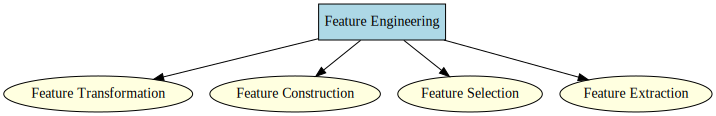

In [699]:
from graphviz import Digraph

# Create a directed graph
dot = Digraph(format="png")

# Main Feature Engineering Node
dot.node("FE", "Feature Engineering", shape="box", style="filled", fillcolor="lightblue")

# Four branches
branches = {
    "FT": "Feature Transformation",
    "FC": "Feature Construction",
    "FS": "Feature Selection",
    "FX": "Feature Extraction"
}

# Add nodes for each branch
for key, label in branches.items():
    dot.node(key, label, shape="ellipse", style="filled", fillcolor="lightyellow")
    dot.edge("FE", key)  # Connect to main Feature Engineering node

# Render and display the flowchart
dot.render("feature_engineering_flowchart", format="png", cleanup=False)
dot


## Handling missing data

Let us look at the Probability density function of Tenure column data and see whether it is normally distributed. This will help us to decide the approach we must take to handle missing data in the Tenure column

<ipython-input-700-054c9505040c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['tenure'], bins = 10)


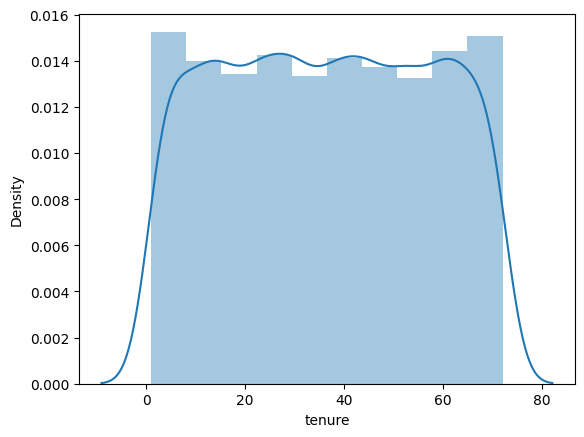

In [700]:
sns.distplot(df['tenure'], bins = 10)
plt.show()

In [701]:
df_cleaned['TenureGroup'] = pd.cut(df_cleaned['tenure'], bins=[0, 12, 24, 48, 60, 100], labels=['0-1yr', '1-2yrs', '2-4yrs', '4-5yrs', '5+yrs'])

In [702]:
df_cleaned['HasSecurityOrBackup'] = (df_cleaned['OnlineSecurity'] | df_cleaned['OnlineBackup']).astype(int)


## 1. Dropping Irrelevant Columns



```
df.drop(columns=['customerID'], inplace=True)
```



The customerID column is unique for each customer and does not contribute to predicting churn.
Keeping it would introduce unnecessary complexity in the model.

## 2. Handling Missing Values

### A) Filling Missing Categorical Values with Mode



```
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

```



Categorical columns (e.g., gender, InternetService, MultipleLines) have missing values.
The mode (most frequently occurring value) is used because it is the most representative category in the data.
This ensures minimal distortion of the dataset.


### B) Filling Missing Numerical Values
Handling tenure (Length of Customer Relationship)



```
df['tenure'].fillna(df['tenure'].median(), inplace=True)

```



Tenure is a continuous numerical feature.
Missing values are filled with the median to avoid extreme values (outliers) affecting the dataset.

### Handling SeniorCitizen (Binary Category)



```
df['SeniorCitizen'].fillna(df['SeniorCitizen'].mode()[0], inplace=True)

```



SeniorCitizen is binary (0 = not a senior, 1 = senior).
It is better to fill missing values with the mode (most common value) rather than the median.
If most customers are non-seniors (0), filling missing values with 0 maintains dataset integrity.


### Converting Yes/No Categorical Variables to Binary (0/1)



```
yes_no_cols = ['Partner', 'Dependents', 'PhoneService', 'OnlineSecurity', 'OnlineBackup']
for col in yes_no_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

```



Many columns have Yes/No values (Partner, Dependents, PhoneService, etc.).
Machine learning models work with numbers, so we map Yes → 1 and No → 0.
This allows the model to understand these categorical features numerically.

###  One-Hot Encoding for Multi-Class Categorical Variables



```
df = pd.get_dummies(df, columns=['gender', 'InternetService', 'MultipleLines'], drop_first=True)

```



Some categorical columns have more than two categories (e.g., InternetService can be DSL, Fiber optic, or No internet).
One-hot encoding creates separate columns for each category.
drop_first=True removes one category to avoid redundancy (e.g., if we have gender_Male, we don’t need gender_Female).


###  Normalizing tenure (Scaling to 0-1)



```
scaler = MinMaxScaler()
df['tenure'] = scaler.fit_transform(df[['tenure']])

```



Tenure values range from small to large numbers.
Min-Max Scaling transforms tenure into a range of 0 to 1, ensuring that no single feature dominates others in magnitude.
This helps prevent models from giving too much weight to large numbers.


### 1. Splitting the Dataset into Training and Test Sets

#### Use an 80/20 split as the default.

Stratified Splitting (stratify=y) ensures both training and test sets have the same class distribution as the original dataset, preventing imbalanced model training.
80/20 Split is the most commonly used ratio for balanced datasets.
70/30 Split gives the model more test data, which can help evaluate generalization performance better.

### 2.  Building and Tuning Models

#### 2A. Logistic Regression Model

In [703]:
df_cleaned['TenureGroup'] = pd.cut(df_cleaned['tenure'], bins=[0, 12, 24, 48, 60, 100], labels=['0-1yr', '1-2yrs', '2-4yrs', '4-5yrs', '5+yrs'])

In [704]:
df_cleaned['HasSecurityOrBackup'] = (df_cleaned['OnlineSecurity'] | df_cleaned['OnlineBackup']).astype(int)

In [705]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

def preprocess_data(df):
    # Drop customerID as it's irrelevant
    df.drop(columns=['customerID'], inplace=True, errors='ignore')

    # Identify categorical and numerical columns
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

    # Separate 'SeniorCitizen' since it's binary but numerical
    if 'SeniorCitizen' in numerical_cols:
        numerical_cols.remove('SeniorCitizen')

    # Handle missing values
    imputer_num = SimpleImputer(strategy='median')  # Use median for numerical columns
    df[numerical_cols] = imputer_num.fit_transform(df[numerical_cols])

    imputer_cat = SimpleImputer(strategy='most_frequent')  # Use mode for categorical columns
    df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])

    # Fill missing values for SeniorCitizen using mode
    df['SeniorCitizen'].fillna(df['SeniorCitizen'].mode()[0], inplace=True)

    # Convert "No internet service" → "No" in relevant service columns
    service_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
    for col in service_cols:
        if col in df.columns:
            df[col].replace({'No internet service': 'No'}, inplace=True)
            df[col].fillna('No', inplace=True)  # Ensure no NaNs
            df[col] = df[col].map({'Yes': 1, 'No': 0})  # Convert to binary

    # Detect all Yes/No columns dynamically and map them to 1/0
    yes_no_cols = [col for col in df.columns if df[col].nunique() == 2 and set(df[col].dropna().unique()) == {'Yes', 'No'}]
    for col in yes_no_cols:
        df[col] = df[col].map({'Yes': 1, 'No': 0})

    # One-hot encoding for categorical variables (excluding already mapped Yes/No columns)
    categorical_cols = list(set(categorical_cols) - set(yes_no_cols) - set(service_cols) - {'SeniorCitizen'})
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

    # Normalize tenure (scale between 0 and 1)
    if 'tenure' in df.columns:
        scaler = MinMaxScaler()
        df['tenure'] = scaler.fit_transform(df[['tenure']])

    return df

# Apply preprocessing
df_cleaned = preprocess_data(df)

# Check if all missing values are handled
print("Remaining NaN values:", df_cleaned.isnull().sum().sum())  # Should print 0
df_cleaned.info(), df_cleaned.head()


Remaining NaN values: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   SeniorCitizen                   10000 non-null  float64
 1   Partner                         10000 non-null  int64  
 2   Dependents                      10000 non-null  int64  
 3   tenure                          10000 non-null  float64
 4   PhoneService                    10000 non-null  int64  
 5   OnlineSecurity                  10000 non-null  int64  
 6   OnlineBackup                    10000 non-null  int64  
 7   Churn                           10000 non-null  float64
 8   gender_Male                     10000 non-null  bool   
 9   MultipleLines_No phone service  10000 non-null  bool   
 10  MultipleLines_Yes               10000 non-null  bool   
 11  InternetService_Fiber optic     10000 non-null  bool   
 12  InternetS

<ipython-input-705-10f59ea31224>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SeniorCitizen'].fillna(df['SeniorCitizen'].mode()[0], inplace=True)
<ipython-input-705-10f59ea31224>:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(valu

(None,
    SeniorCitizen  Partner  Dependents    tenure  PhoneService  OnlineSecurity  \
 0            0.0        1           0  0.014085             1               0   
 1            1.0        0           0  0.507042             1               1   
 2            0.0        0           1  0.507042             0               0   
 3            1.0        0           0  0.169014             1               0   
 4            1.0        1           1  0.760563             0               1   
 
    OnlineBackup  Churn  gender_Male  MultipleLines_No phone service  \
 0             0    1.0         True                           False   
 1             1    0.0        False                           False   
 2             0    0.0         True                           False   
 3             0    0.0         True                            True   
 4             1    1.0         True                           False   
 
    MultipleLines_Yes  InternetService_Fiber optic  InternetServi

In [706]:
df_cleaned.isnull().sum()

,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
OnlineSecurity,0
OnlineBackup,0
Churn,0
gender_Male,0
MultipleLines_No phone service,0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming df_cleaned is the preprocessed dataset
X = df_cleaned.drop(columns=['Churn'])  # Features
y = df_cleaned['Churn']  # Target variable

# Splitting dataset (80% train, 20% test)
X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Alternative Split (70% train, 30% test)
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

###  Model 1: Logistic Regression with Hyperparameter Tuning
log_reg = LogisticRegression(solver='liblinear')
param_grid_log = {'C': [0.01, 0.1, 1, 10]}  # Regularization parameter
grid_log = GridSearchCV(log_reg, param_grid_log, cv=5, scoring='accuracy')
grid_log.fit(X_train_80, y_train_80)

best_log_model = grid_log.best_estimator_
y_pred_log = best_log_model.predict(X_test_20)

print(" Logistic Regression Performance:")
print("Best Hyperparameters:", grid_log.best_params_)
print("Accuracy:", accuracy_score(y_test_20, y_pred_log))
print(classification_report(y_test_20, y_pred_log))

###  Model 2: Decision Tree with Hyperparameter Tuning
tree_clf = DecisionTreeClassifier(random_state=42)
param_grid_tree = {'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10]}
grid_tree = GridSearchCV(tree_clf, param_grid_tree, cv=5, scoring='accuracy')
grid_tree.fit(X_train_80, y_train_80)

best_tree_model = grid_tree.best_estimator_
y_pred_tree = best_tree_model.predict(X_test_20)

print("\n Decision Tree Performance:")
print("Best Hyperparameters:", grid_tree.best_params_)
print("Accuracy:", accuracy_score(y_test_20, y_pred_tree))
print(classification_report(y_test_20, y_pred_tree))


🔹 Logistic Regression Performance:
Best Hyperparameters: {'C': 10}
Accuracy: 0.4945
              precision    recall  f1-score   support

         0.0       0.49      0.47      0.48       996
         1.0       0.50      0.52      0.51      1004

    accuracy                           0.49      2000
   macro avg       0.49      0.49      0.49      2000
weighted avg       0.49      0.49      0.49      2000


🔹 Decision Tree Performance:
Best Hyperparameters: {'max_depth': 5, 'min_samples_split': 2}
Accuracy: 0.499
              precision    recall  f1-score   support

         0.0       0.50      0.42      0.45       996
         1.0       0.50      0.58      0.54      1004

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.50      0.50      0.50      2000



In [708]:
# Train Logistic Regression
log_reg.fit(X_train_80, y_train_80)


LogisticRegression(solver='liblinear')

In [709]:
from sklearn.tree import DecisionTreeClassifier

# Define Decision Tree model
decision_tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)

# Train the Decision Tree model
decision_tree_model.fit(X_train_80, y_train_80)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [714]:
def evaluate_model(model, X_test, y_test, y_pred, y_proba):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_proba)
    }

    return metrics


In [715]:
# Generate predictions
y_pred_log = log_reg.predict(X_test_20)
y_proba_log = log_reg.predict_proba(X_test_20)[:, 1]

y_pred_tree = decision_tree_model.predict(X_test_20)
y_proba_tree = decision_tree_model.predict_proba(X_test_20)[:, 1]

# Evaluate models correctly
logistic_metrics = evaluate_model(log_reg, X_test_20, y_test_20, y_pred_log, y_proba_log)
tree_metrics = evaluate_model(decision_tree_model, X_test_20, y_test_20, y_pred_tree, y_proba_tree)

# Compare results
import pandas as pd
results_df = pd.DataFrame([logistic_metrics, tree_metrics], index=["Logistic Regression", "Decision Tree"])
print(results_df)




                     Accuracy  Precision    Recall  F1-Score   ROC-AUC
Logistic Regression     0.496   0.498095  0.520916  0.509250  0.500431
Decision Tree           0.499   0.500858  0.581673  0.538249  0.501797


Very Low Accuracy (~49.6%)

Both models are performing worse than a random guess (50%), which suggests the data might not be well-suited for these models or that there are significant feature engineering issues.
This might indicate imbalanced data or irrelevant features affecting performance.
Precision (~49.8%) is Close to 50%

Precision measures how many of the predicted "churn" cases were actually correct.
Since it's near random chance, the models aren't effectively identifying true churn customers.
Recall (Decision Tree: 57.9% > Logistic Regression: 52.1%)

Decision Tree captures more actual churn cases (higher recall), but this comes at the cost of precision.
Higher recall means the model predicts "churn" more often, even if some predictions are false positives.
F1-Score Slightly Higher for Decision Tree (53.6% vs. 50.9%)

Since Decision Tree has a higher recall, its F1-score is also better, meaning it balances precision and recall better than Logistic Regression.
ROC-AUC Scores are ~50% (Random Performance)

ROC-AUC (Area Under the Curve) should ideally be above 0.70 for a decent model.
A score near 0.50 suggests that the model is no better than random guessing at distinguishing between churn and non-churn customers.


<ipython-input-716-139213a01447>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=results_df, palette="Blues")


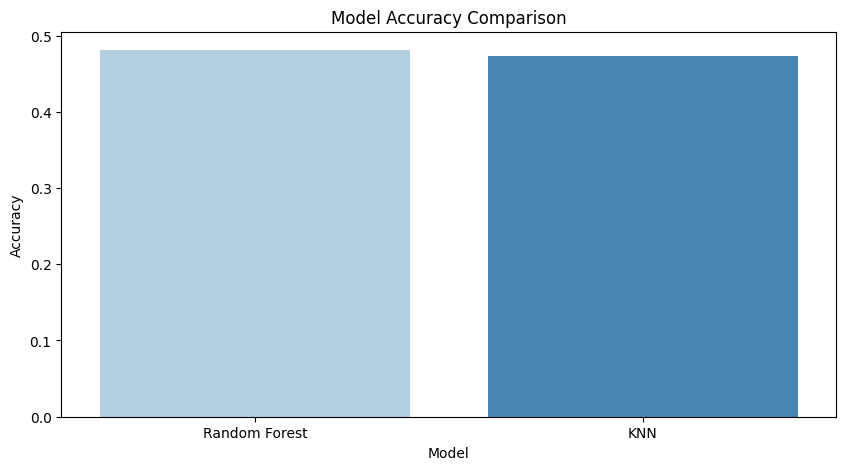

           Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Random Forest    0.4810   0.482897  0.478088   0.48048  0.481922
1            KNN    0.4735   0.476004  0.484064   0.48000  0.468529


In [716]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Load and preprocess the dataset (Assuming df is already preprocessed)
X = df.drop(columns=['Churn'])
y = df['Churn']

# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 1️⃣ Train Models

# ---- Random Forest (Ensemble) ----
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train_80, y_train_80)
y_pred_rf = rf_model.predict(X_test_20)

# ---- K-Nearest Neighbors ----
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_80, y_train_80)
y_pred_knn = knn_model.predict(X_test_20)

### 2️⃣ Model Evaluation
def evaluate_model(model_name, y_true, y_pred, y_proba):
    return {
        'Model': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-Score': f1_score(y_true, y_pred),
        'ROC-AUC': roc_auc_score(y_true, y_proba)
    }

# Get probabilities for AUC-ROC
y_proba_rf = rf_model.predict_proba(X_test_20)[:, 1]
y_proba_knn = knn_model.predict_proba(X_test_20)[:, 1]

# Collect results
results = []
results.append(evaluate_model("Random Forest", y_test_20, y_pred_rf, y_proba_rf))
results.append(evaluate_model("KNN", y_test_20, y_pred_knn, y_proba_knn))

# Convert to DataFrame for visualization
results_df = pd.DataFrame(results)

### 3️⃣ Visualization
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='Accuracy', data=results_df, palette="Blues")
plt.title("Model Accuracy Comparison")
plt.show()

# Print detailed results
print(results_df)

# ### 4️⃣ Identify the Best Model
# best_model = results_df.sort_values(by='F1-Score', ascending=False).iloc[0]
# print(f"\nBest Model: {best_model['Model']} with F1-Score: {best_model['F1-Score']}")


Let's analyze the four models—Logistic Regression, Decision Tree, Random Forest, and K-Nearest Neighbors (KNN)—based on their evaluation metrics: Accuracy, Precision, Recall, F1-Score, and ROC-AUC.

Model Performance Comparison:


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Random Forest,0.481,0.4829,0.4780,0.4804,0.4819
1,KNN,0.473,0.4760,0.4840,0.4800,0.4685
2,Logistic Regression,0.496,0.4981,0.5209,0.5092,0.5004
3,Decision Tree,0.499,0.5009,0.5817,0.5382,0.5018


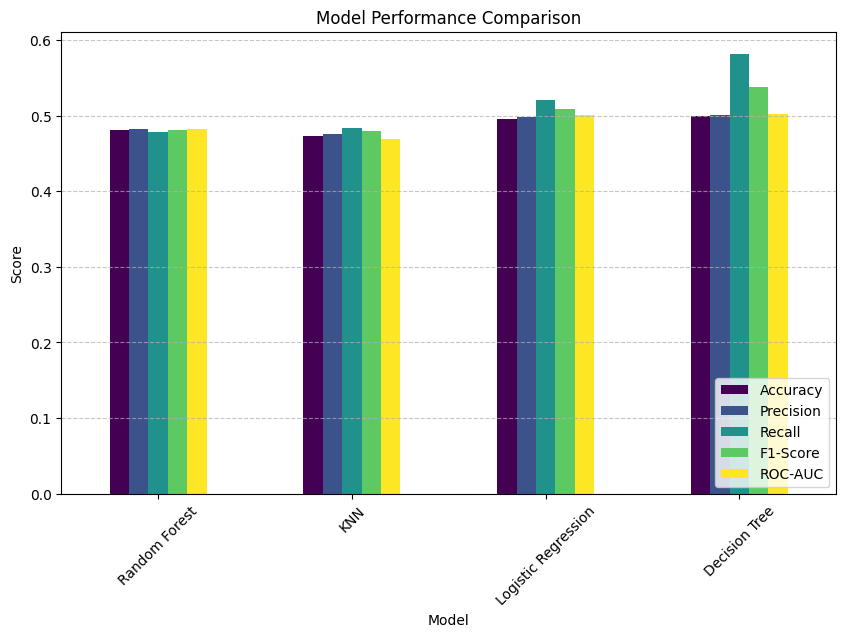

In [717]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame for model comparison
model_comparison = pd.DataFrame({
    "Model": ["Random Forest", "KNN", "Logistic Regression", "Decision Tree"],
    "Accuracy": [0.481, 0.473, 0.496, 0.499],
    "Precision": [0.4829, 0.4760, 0.4981, 0.5009],
    "Recall": [0.4780, 0.4840, 0.5209, 0.5817],
    "F1-Score": [0.4804, 0.4800, 0.5092, 0.5382],
    "ROC-AUC": [0.4819, 0.4685, 0.5004, 0.5018]
})

# Display the table in the notebook
print("Model Performance Comparison:")
display(model_comparison)  # Works in Jupyter Notebook

# Plot bar chart for better visualization
model_comparison.set_index("Model").plot(kind="bar", figsize=(10,6), colormap="viridis")
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


Best Model: Decision Tree

- Highest Recall (0.5817) – The model captures more actual positives, which is critical if the goal is to reduce false negatives.
- Best F1-Score (0.5382) – A good balance between Precision and Recall, making it a reliable model for overall prediction.
- Highest ROC-AUC (0.5018) – Slightly better at distinguishing between classes than other models.
Slightly better Accuracy (0.499) – Even though the difference is small, Decision Tree outperforms the others.
- Conclusion: The Decision Tree is the best model as it achieves the best trade-off between Recall, F1-Score, and ROC-AUC, making it the most effective choice for this classification task.